In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np

import utils.windFarms as wfman
from utils.networks import GraphNeuralNet as GNN
from utils.graphNetHelpers import graph2inputs
from utils.testUtils import test_direction, test_speed, test_speed_direction, pprint_graph, test_turbine_numbers
import matplotlib.pyplot as plt
import torch

In [3]:
x_grid_size = 3000
y_grid_size = 3000
base_config_path = '../configs/example_input_JK100.json'
update_config_path = '../configs/update_floris_configs.json'
single_input_path = '../configs/example_input_single.json'
min_distance_factor = 2.0
angle_threshold = 90

wind_farm_man = wfman.RandomSampleManager(x_grid_size=x_grid_size,
                                          y_grid_size=y_grid_size,
                                          update_config_json_path=update_config_path,
                                          base_config_json_path=base_config_path,
                                          single_input_path=single_input_path,
                                          angle_threshold=angle_threshold,
                                          min_distance_factor=min_distance_factor,
                                          dist_cutoff_factor=25)

In [15]:
wind_farm_man.x_coords

[84.97067799256652,
 1381.9707294731834,
 218.9245796466729,
 735.261893706891,
 2329.999213942138,
 555.3575217372698,
 2280.3761888606127,
 1949.0645956574049,
 2504.941837139823,
 1169.5984261314923,
 361.08151676075374,
 2391.214721150586,
 2373.9295071580214,
 1954.471652558466,
 228.66141118659078,
 825.4697491570217,
 2525.0446453762547,
 2316.1461791186985,
 2578.9208823856143,
 1334.4135417133655,
 2648.390364671818,
 1088.2460380975815,
 264.58442081192356,
 48.376804588367236,
 646.6622320561706,
 2901.656541091096,
 1804.0578798533093,
 1606.5592186079984,
 1465.450226746181,
 1919.3306421653988,
 2915.3157830705563,
 823.5826258375552,
 991.7360217390153,
 2057.441632585489,
 1718.5850391401339,
 87.9780833263597,
 214.08899249063973,
 1323.316550066724,
 766.5332742268494,
 730.8799163249901,
 1918.537529602783,
 1905.89858655538,
 1404.4134755974083,
 1427.66166866858]

In [4]:
pib_path = '../pib_saves/pib8'
dib_path = '../dib_saves/dib0'

pib_load = GNN.load(pib_path, device='cpu')
dib_load = GNN.load(dib_path, device='cpu')
pib_load.eval()
dib_load.eval()

GraphNeuralNet(
  (layers): ModuleList(
    (0): GraphNetworkBlock(
      (encoders): ModuleList(
        (0): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=8, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True)
          )
        )
        (1): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=54, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True

In [5]:
use_power = True

In [6]:
wind_speed = np.linspace(8.0, 15.0, 20)
wind_directions = np.linspace(0, 360, 20)

In [7]:
num_turbines = np.arange(5, 45).tolist()
pib_mean, pib_stds = test_turbine_numbers(pib_load, wind_farm_man, num_turbines)

[0/40] Comutping 5 case 
[1/40] Comutping 6 case 
[2/40] Comutping 7 case 
[3/40] Comutping 8 case 
[4/40] Comutping 9 case 
[5/40] Comutping 10 case 
[6/40] Comutping 11 case 
[7/40] Comutping 12 case 
[8/40] Comutping 13 case 
[9/40] Comutping 14 case 
[10/40] Comutping 15 case 
[11/40] Comutping 16 case 
[12/40] Comutping 17 case 
[13/40] Comutping 18 case 
[14/40] Comutping 19 case 
[15/40] Comutping 20 case 
[16/40] Comutping 21 case 
[17/40] Comutping 22 case 
[18/40] Comutping 23 case 
[19/40] Comutping 24 case 
[20/40] Comutping 25 case 
[21/40] Comutping 26 case 
[22/40] Comutping 27 case 
[23/40] Comutping 28 case 
[24/40] Comutping 29 case 
[25/40] Comutping 30 case 
[26/40] Comutping 31 case 
[27/40] Comutping 32 case 
[28/40] Comutping 33 case 
[29/40] Comutping 34 case 
[30/40] Comutping 35 case 
[31/40] Comutping 36 case 
[32/40] Comutping 37 case 
[33/40] Comutping 38 case 
[34/40] Comutping 39 case 
[35/40] Comutping 40 case 
[36/40] Comutping 41 case 
[37/40] Comutpin

In [8]:
dib_mean, dib_stds = test_turbine_numbers(dib_load, wind_farm_man, num_turbines)

[0/40] Comutping 5 case 
[1/40] Comutping 6 case 
[2/40] Comutping 7 case 
[3/40] Comutping 8 case 
[4/40] Comutping 9 case 
[5/40] Comutping 10 case 
[6/40] Comutping 11 case 
[7/40] Comutping 12 case 
[8/40] Comutping 13 case 
[9/40] Comutping 14 case 
[10/40] Comutping 15 case 
[11/40] Comutping 16 case 
[12/40] Comutping 17 case 
[13/40] Comutping 18 case 
[14/40] Comutping 19 case 
[15/40] Comutping 20 case 
[16/40] Comutping 21 case 
[17/40] Comutping 22 case 
[18/40] Comutping 23 case 
[19/40] Comutping 24 case 
[20/40] Comutping 25 case 
[21/40] Comutping 26 case 
[22/40] Comutping 27 case 
[23/40] Comutping 28 case 
[24/40] Comutping 29 case 
[25/40] Comutping 30 case 
[26/40] Comutping 31 case 
[27/40] Comutping 32 case 
[28/40] Comutping 33 case 
[29/40] Comutping 34 case 
[30/40] Comutping 35 case 
[31/40] Comutping 36 case 
[32/40] Comutping 37 case 
[33/40] Comutping 38 case 
[34/40] Comutping 39 case 
[35/40] Comutping 40 case 
[36/40] Comutping 41 case 
[37/40] Comutpin

In [9]:
pib_upper = np.array(pib_mean) + np.array(pib_stds)
pib_lower = np.array(pib_mean) - np.array(pib_stds)

dib_upper = np.array(dib_mean) + np.array(dib_stds)
dib_lower = np.array(dib_mean) - np.array(dib_stds)

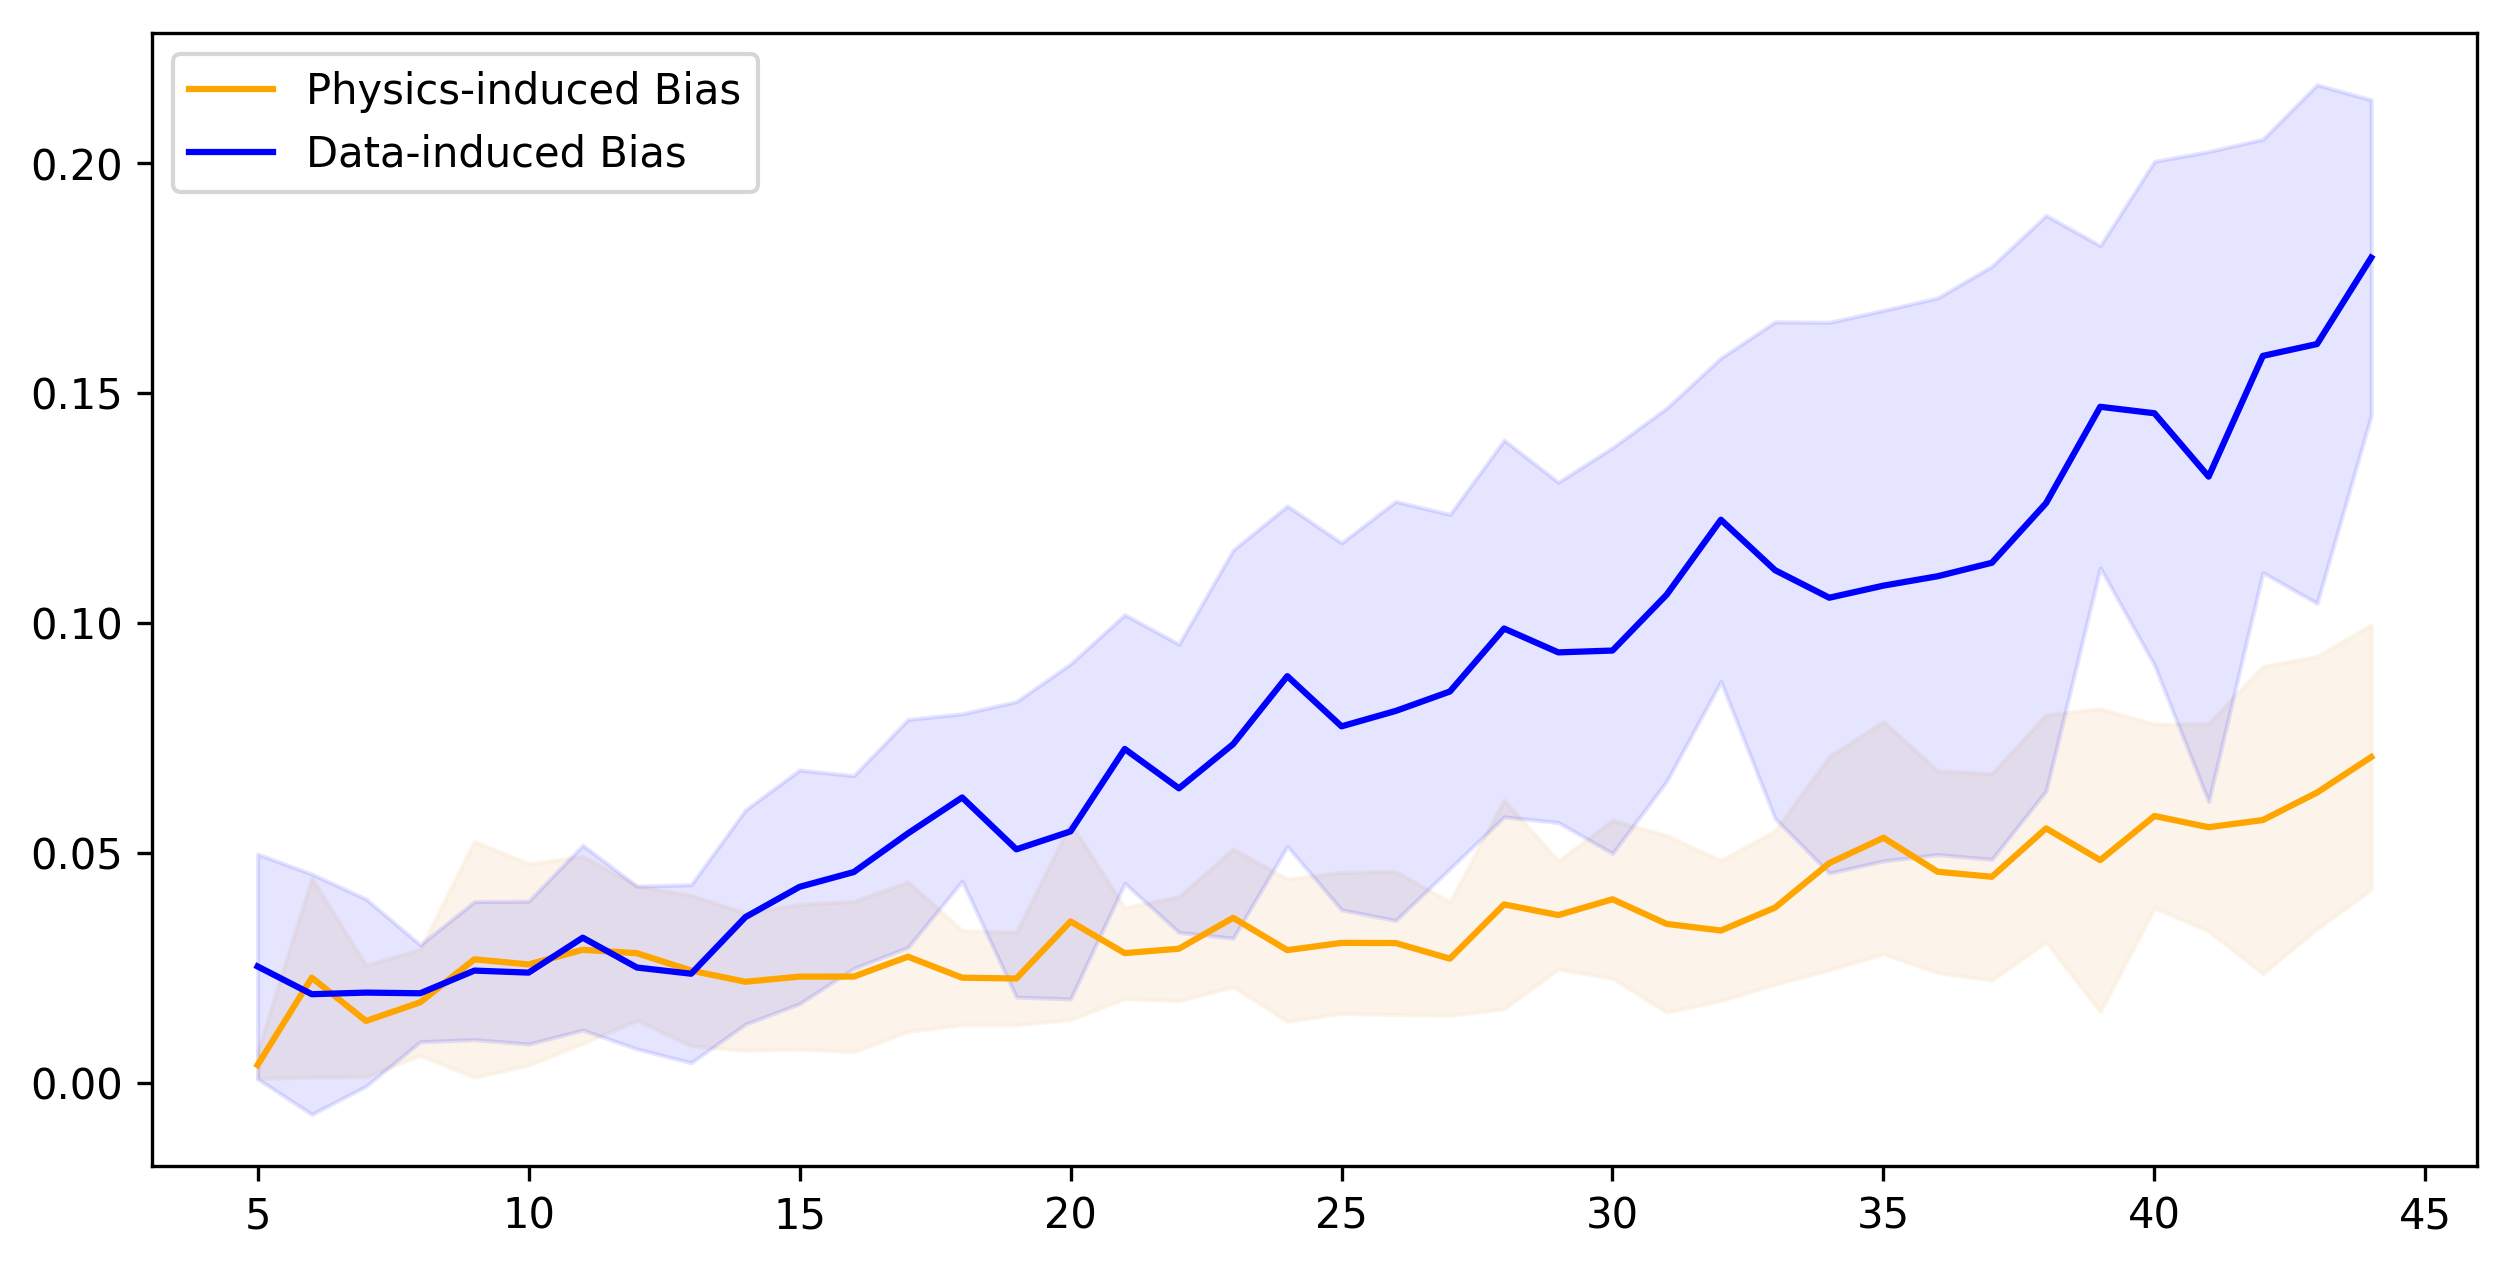

In [12]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
ax.fill_between(num_turbines, pib_upper, pib_lower, color='antiquewhite', alpha=0.5, label='+/- 1 std')
pib_pred, = ax.plot(num_turbines, pib_mean, '-', c='orange', label='Physics-induced Bias')

ax.fill_between(num_turbines, dib_upper, dib_lower, color='b', alpha=0.1, label='+/- 1 std')
dib_pred, = ax.plot(num_turbines, dib_mean, '-', c='b', label='Data-induced Bias')
ax.legend(handles=[pib_pred,dib_pred], loc='upper left')
plt.show()